### **Laptop Price Pridiction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Loading Dataset**

In [2]:
data=pd.read_csv('laptopPrice.csv')
data.head(2)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5


## **Data Stucture**

In [71]:
data2=pd.read_csv('laptopPrice.csv')


In [3]:
data.shape

(823, 19)

In [4]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


## **Duplicates**

In [7]:
data.duplicated().sum()

21

In [8]:
## we have 21 duplicates
# if we won't remove duplicates it will ove learn these so removing duplicates
# Also don't have pimay key
data[data.duplicated()].head(3)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519


In [9]:
data.drop_duplicates(inplace=True)

### **Missing Values**

In [10]:
# No missing value in our data  set
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

### **Encoding**
  - object to text

In [11]:
data.select_dtypes(include='object')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,3 stars
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,3 stars
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,3 stars
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,3 stars


#### **Brand**

In [12]:
# no of classes are huge
# we will apply ordinal encoding
data['brand'].value_counts()

brand
ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: count, dtype: int64

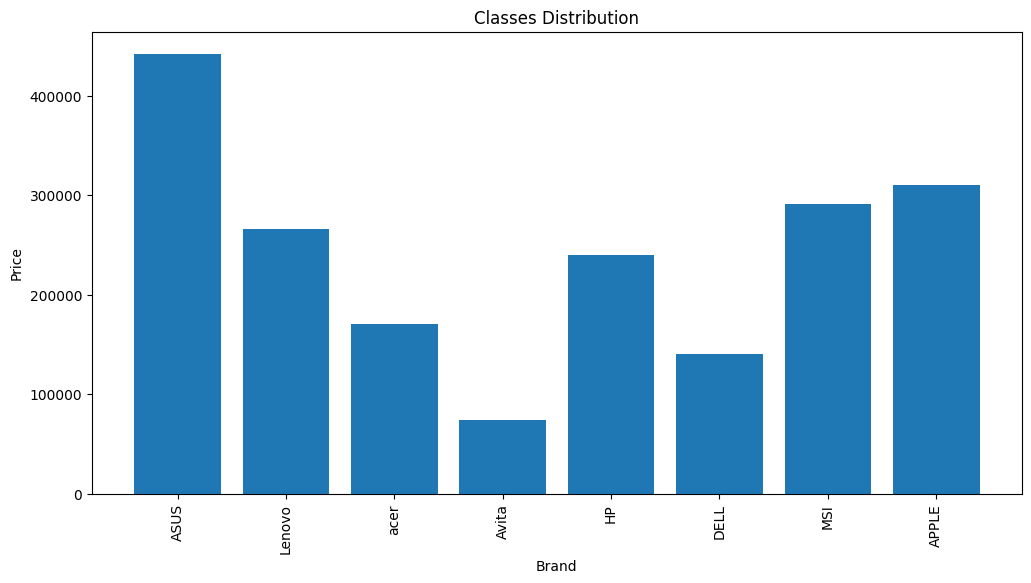

In [13]:
# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(data['brand'], data['Price'])
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Classes Distribution')
plt.show()

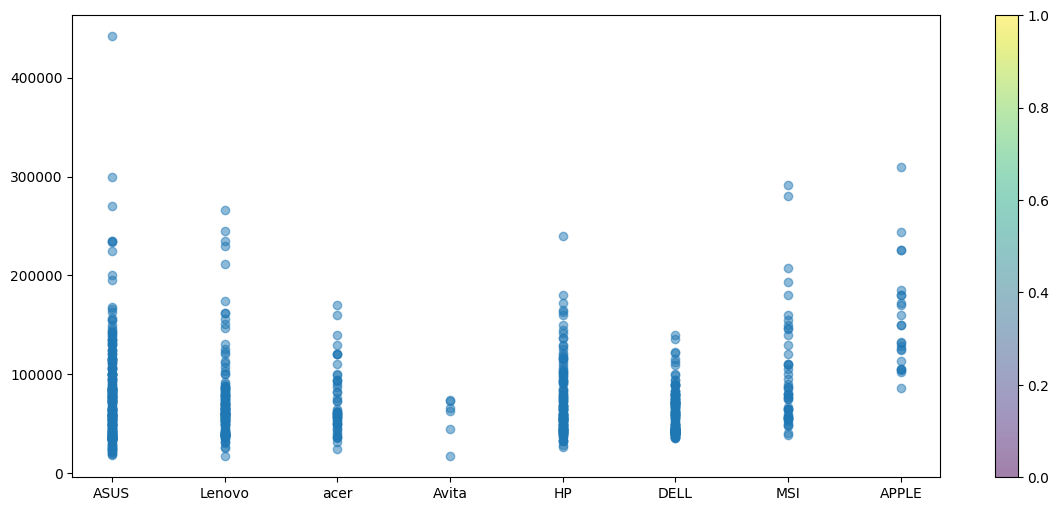

In [14]:
plt.figure(figsize=(14, 6))

plt.scatter(data['brand'], data['Price'], alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

### **processor_name**

In [15]:
# No of Classes Are Large
data['processor_name'].value_counts()

processor_name
Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: count, dtype: int64

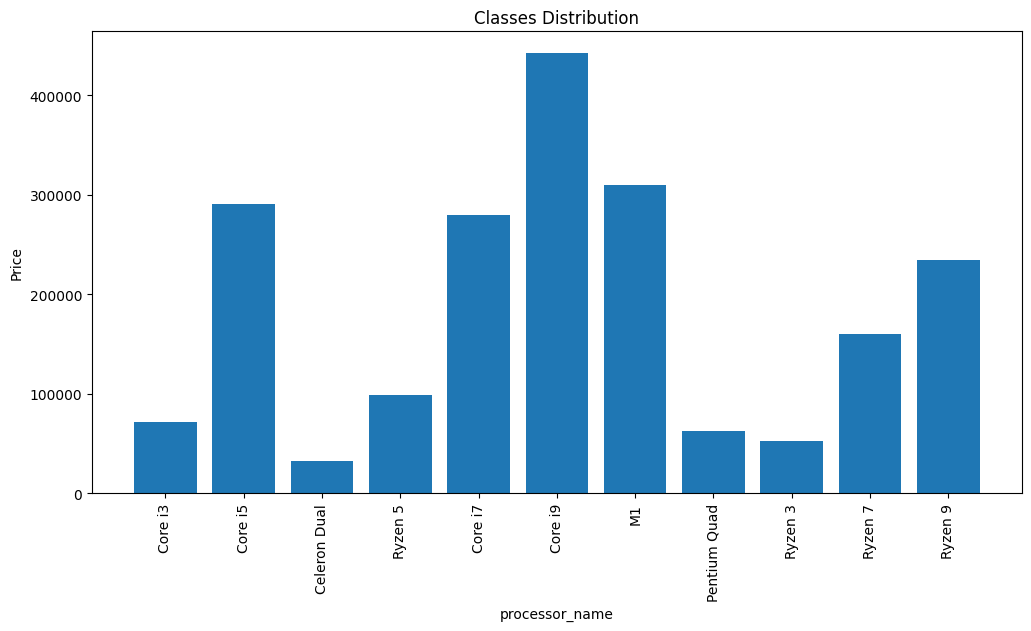

In [16]:
# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(data['processor_name'], data['Price'])
plt.xlabel('processor_name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Classes Distribution')
plt.show()

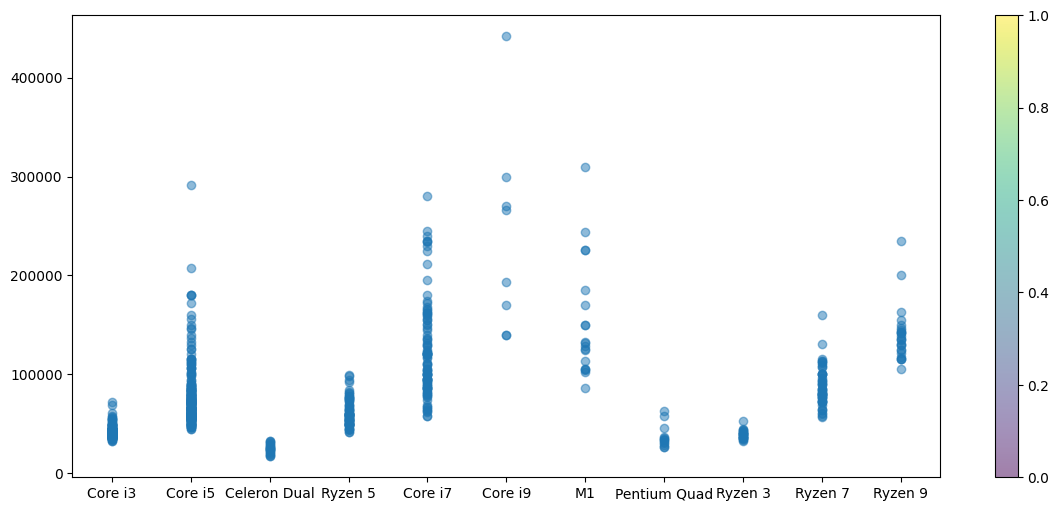

In [17]:
plt.figure(figsize=(14, 6))
plt.scatter(data['processor_name'], data['Price'], alpha=0.5)
plt.colorbar()
plt.show()

### **processor_gnrtn**

In [18]:
# No of Classes Are Large
data['processor_gnrtn'].value_counts()

processor_gnrtn
11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [19]:
## Relation Check
# Creating an Empty Dataframe
generation=pd.DataFrame(columns=['processor_gnrtn','Max_Price','Average_Price'])

for genz in data['processor_gnrtn'].unique():
    subset_data=data[data['processor_gnrtn']==genz]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    generation = pd.concat([generation, pd.DataFrame({
        'processor_gnrtn': [genz],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
generation.sort_values(by='Max_Price',ascending=False)

,processor_gnrtn,Max_Price,Average_Price
2,11th,441990,72065.625000
0,10th,309990,88926.621212
7,12th,299990,239990.000000
4,8th,244801,86535.171429
1,Not Available,234990,69181.669643
5,9th,229900,87891.666667
3,7th,86867,54779.285714
6,4th,52490,52490.000000


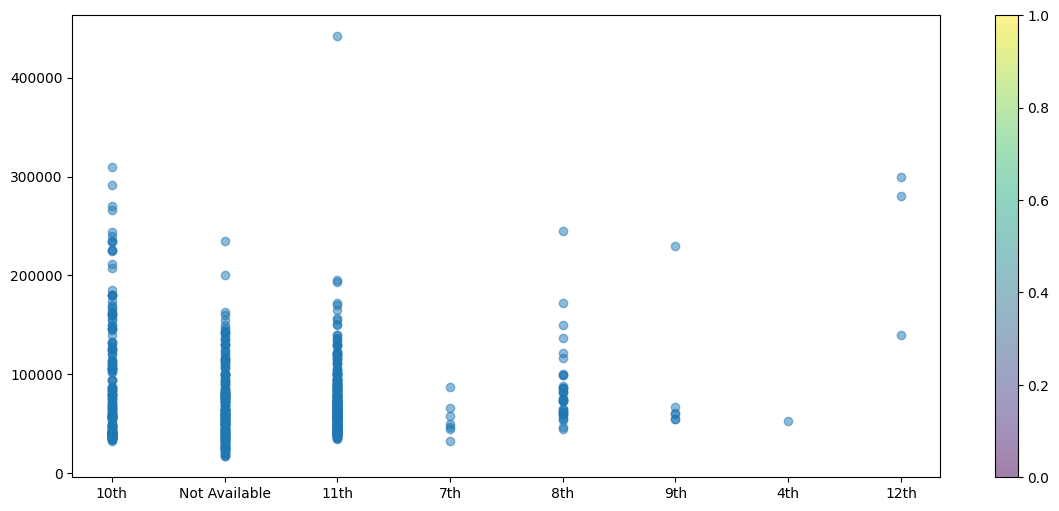

In [20]:
plt.figure(figsize=(14, 6))
plt.scatter(data['processor_gnrtn'], data['Price'], alpha=0.5)
plt.colorbar()
plt.show()

### **ram_type**

In [21]:
# No of Classes Are Large
data['ram_type'].value_counts()

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [22]:
## Relation Check
# Creating an Empty Dataframe
ddr_d=pd.DataFrame(columns=['ram_type','Max_Price','Average_Price'])

for ddrr_r in data['ram_type'].unique():
    subset_data=data[data['ram_type']==ddrr_r]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    ddr_d = pd.concat([ddr_d, pd.DataFrame({
        'ram_type': [ddrr_r],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
ddr_d.sort_values(by='Max_Price',ascending=False)

,ram_type,Max_Price,Average_Price
0,DDR4,441990,71633.927536
3,DDR5,299990,153490.000000
1,LPDDR4,291190,83606.222222
5,LPDDR3,239759,138870.857143
2,LPDDR4X,234990,105651.446429
4,DDR3,172090,97187.857143


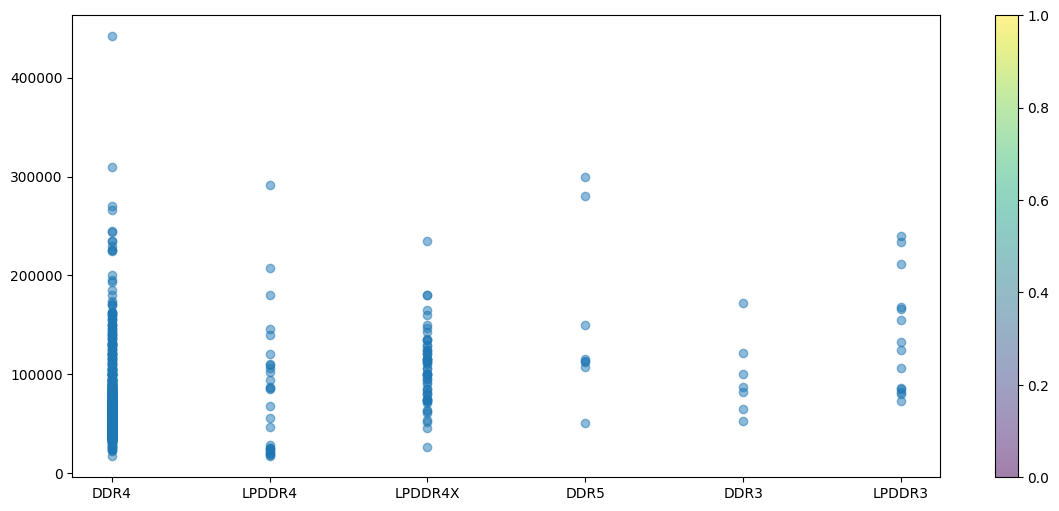

In [23]:
plt.figure(figsize=(14, 6))
plt.scatter(data['ram_type'], data['Price'], alpha=0.5)
plt.colorbar()
plt.show()

## **ssd**

In [24]:
# No of Classes Are Large
data['ssd'].value_counts()

ssd
512 GB     389
256 GB     174
0 GB       123
1024 GB    110
128 GB       3
2048 GB      2
3072 GB      1
Name: count, dtype: int64

In [25]:
## Relation Check
# Creating an Empty Dataframe
ssd_d=pd.DataFrame(columns=['ssd','Max_Price','Average_Price'])

for s_d in data['ssd'].unique():
    subset_data=data[data['ssd']==s_d]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    ssd_d = pd.concat([ssd_d, pd.DataFrame({
        'ssd': [s_d],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
ssd_d.sort_values(by='Max_Price',ascending=True)

,ssd,Max_Price,Average_Price
3,128 GB,116941,83684.333333
2,256 GB,159990,53085.856322
5,2048 GB,233990,196990.000000
1,512 GB,244801,75602.264781
0,0 GB,291190,53283.154472
4,1024 GB,309990,137878.318182
6,3072 GB,441990,441990.000000


In [26]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

### **processor_brand**

In [27]:
#no of classes are small
data['processor_brand'].value_counts()

processor_brand
Intel    594
AMD      189
M1        19
Name: count, dtype: int64

In [28]:
## Relation Check
# Creating an Empty Dataframe
p_brand=pd.DataFrame(columns=['processor_brand','Max_Price','Average_Price'])

for p_b in data['processor_brand'].unique():
    subset_data=data[data['processor_brand']==p_b]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    p_brand = pd.concat([p_brand, pd.DataFrame({
        'processor_brand': [p_b],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
p_brand.sort_values(by='Max_Price',ascending=False)

,processor_brand,Max_Price,Average_Price
0,Intel,441990,74162.860269
2,M1,309990,153726.842105
1,AMD,234990,76614.481481


### **ram_gb**

In [29]:
data['ram_gb'].value_counts()

ram_gb
8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: count, dtype: int64

In [30]:
## Relation Check
# Creating an Empty Dataframe
ramg=pd.DataFrame(columns=['ram_gb','Max_Price','Average_Price'])

for ram in data['ram_gb'].unique():
    subset_data=data[data['ram_gb']==ram]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    ramg = pd.concat([ramg, pd.DataFrame({
        'ram_gb': [ram],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
ramg.sort_values(by='Max_Price',ascending=False)

,ram_gb,Max_Price,Average_Price
2,16 GB,441990,119843.959538
3,32 GB,309990,239990.000000
1,8 GB,291190,66262.294554
0,4 GB,234990,60406.878924


## **hdd**

In [31]:
data['hdd'].value_counts()

hdd
0 GB       602
1024 GB    159
512 GB      40
2048 GB      1
Name: count, dtype: int64

## **os**

In [32]:
## Order check
data['os'].value_counts()

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64

In [33]:
## Relation Check
# Creating an Empty Dataframe
operating_system=pd.DataFrame(columns=['OS','Max_Price','Average_Price'])

for op_s in data['os'].unique():
    subset_data=data[data['os']==op_s]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    operating_system = pd.concat([operating_system, pd.DataFrame({
        'OS': [op_s],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
operating_system.sort_values(by='Max_Price',ascending=False)

,OS,Max_Price,Average_Price
0,Windows,441990,73252.736566
2,Mac,309990,157081.304348
1,DOS,291190,121811.125000


## **graphic_card_gb**

In [34]:
data['graphic_card_gb'].value_counts()

graphic_card_gb
0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: count, dtype: int64

In [35]:
## Relation Check
# Creating an Empty Dataframe
graphic=pd.DataFrame(columns=['graphic_card_gb','Max_Price','Average_Price'])

for gc in data['graphic_card_gb'].unique():
    subset_data=data[data['graphic_card_gb']==gc]
    
    #Calculating Min, Max,Avg Values
    max_avg=subset_data['Price'].max()
    avg_val=subset_data['Price'].mean()

    # Append to the DataFrame
    graphic = pd.concat([graphic, pd.DataFrame({
        'graphic_card_gb': [gc],
        'Max_Price': [max_avg],
        'Average_Price': [avg_val]
    })], ignore_index=True)
# Display the resulting DataFrame
graphic.sort_values(by='Max_Price',ascending=False)

,graphic_card_gb,Max_Price,Average_Price
3,6 GB,441990,148265.054054
0,0 GB,309990,66211.332136
4,8 GB,279990,188369.142857
1,2 GB,244801,77912.955224
2,4 GB,234990,88431.740157


## **weight**

In [36]:
data['weight'].value_counts()

weight
Casual        509
ThinNlight    254
Gaming         39
Name: count, dtype: int64

## **warranty**

In [37]:
data['warranty'].value_counts()

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64

## **os_bit**

In [38]:
# get dummies
data['os_bit'].value_counts()

os_bit
64-bit    693
32-bit    109
Name: count, dtype: int64

## **rating**

In [39]:
data['rating'].value_counts()

rating
4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: count, dtype: int64

## Applying Ordinal Encoding on Categorical data 

In [40]:
## Applying Ordinal Encoding on the above columns
# Label Encoding assigns a unique integer to each category. This method does not take into account any ordinal relationship
#between categories and is often used for categorical variables where the categories do not have an intrinsic order.
## CALC,CAEC,MTRANS,NObeyesdad  Check for Order
# NObeyesdad BMI Test Height and Age
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

object_column=data[['brand','ssd','ram_type','processor_gnrtn','processor_name','processor_brand','hdd','os','os_bit','graphic_card_gb','weight','os_bit','warranty','rating','ram_gb']]

for i in object_column:
    data[i]=label_encoder.fit_transform(data[i])


### Will use get dummies on binary

## **msoffice**

In [41]:
#get dummies
data['msoffice'].value_counts()

msoffice
No     522
Yes    280
Name: count, dtype: int64

## **Touchscreen**

In [42]:
#get dummies
data['Touchscreen'].value_counts()

Touchscreen
No     706
Yes     96
Name: count, dtype: int64

In [43]:
##One hot dummy Encoding
data=pd.get_dummies(data,columns=['Touchscreen','msoffice'],dtype=int,drop_first=True)
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Price,rating,Number of Ratings,Number of Reviews,Touchscreen_Yes,msoffice_Yes
0,1,1,1,0,2,1,0,1,2,1,0,0,3,34649,1,3,0,0,0
1,5,1,1,0,2,1,0,1,2,1,0,0,3,38999,2,65,5,0,0
2,5,1,1,0,2,1,0,1,2,1,0,0,3,39999,2,8,1,0,0
3,1,1,2,0,3,1,6,0,2,0,1,0,3,69990,2,0,0,0,0
4,1,1,0,7,2,1,0,3,2,1,0,0,3,26990,2,0,0,0,0


In [44]:
data['Number of Ratings'].value_counts()

Number of Ratings
0       243
3        23
4        18
17       17
7        13
       ... 
216       1
262       1
1753      1
1681      1
204       1
Name: count, Length: 282, dtype: int64

In [45]:
data.drop(columns=['Number of Ratings','Number of Reviews'],inplace=True)

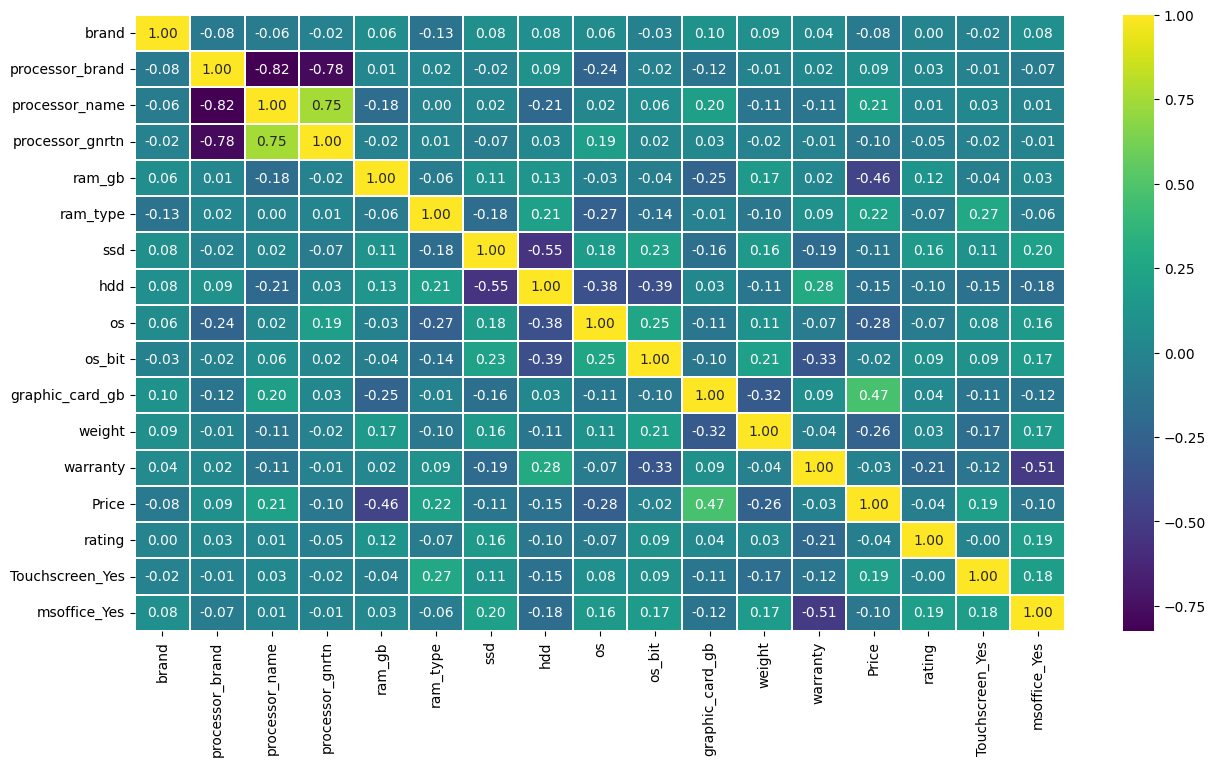

In [46]:
#Last after Encoding
import seaborn as sns
plt.figure(figsize=(15, 8))
correlation=data.corr()
ax=sns.heatmap(correlation,annot=True,cmap='viridis',linewidth=0.1, fmt='.2f')  #coolwarm
# Adjust the aspect ratio to control column width
ax.set_aspect("auto")
plt.show()

## **Model Training**

In [47]:
X=data.drop(columns=['Price'])
y=data['Price']

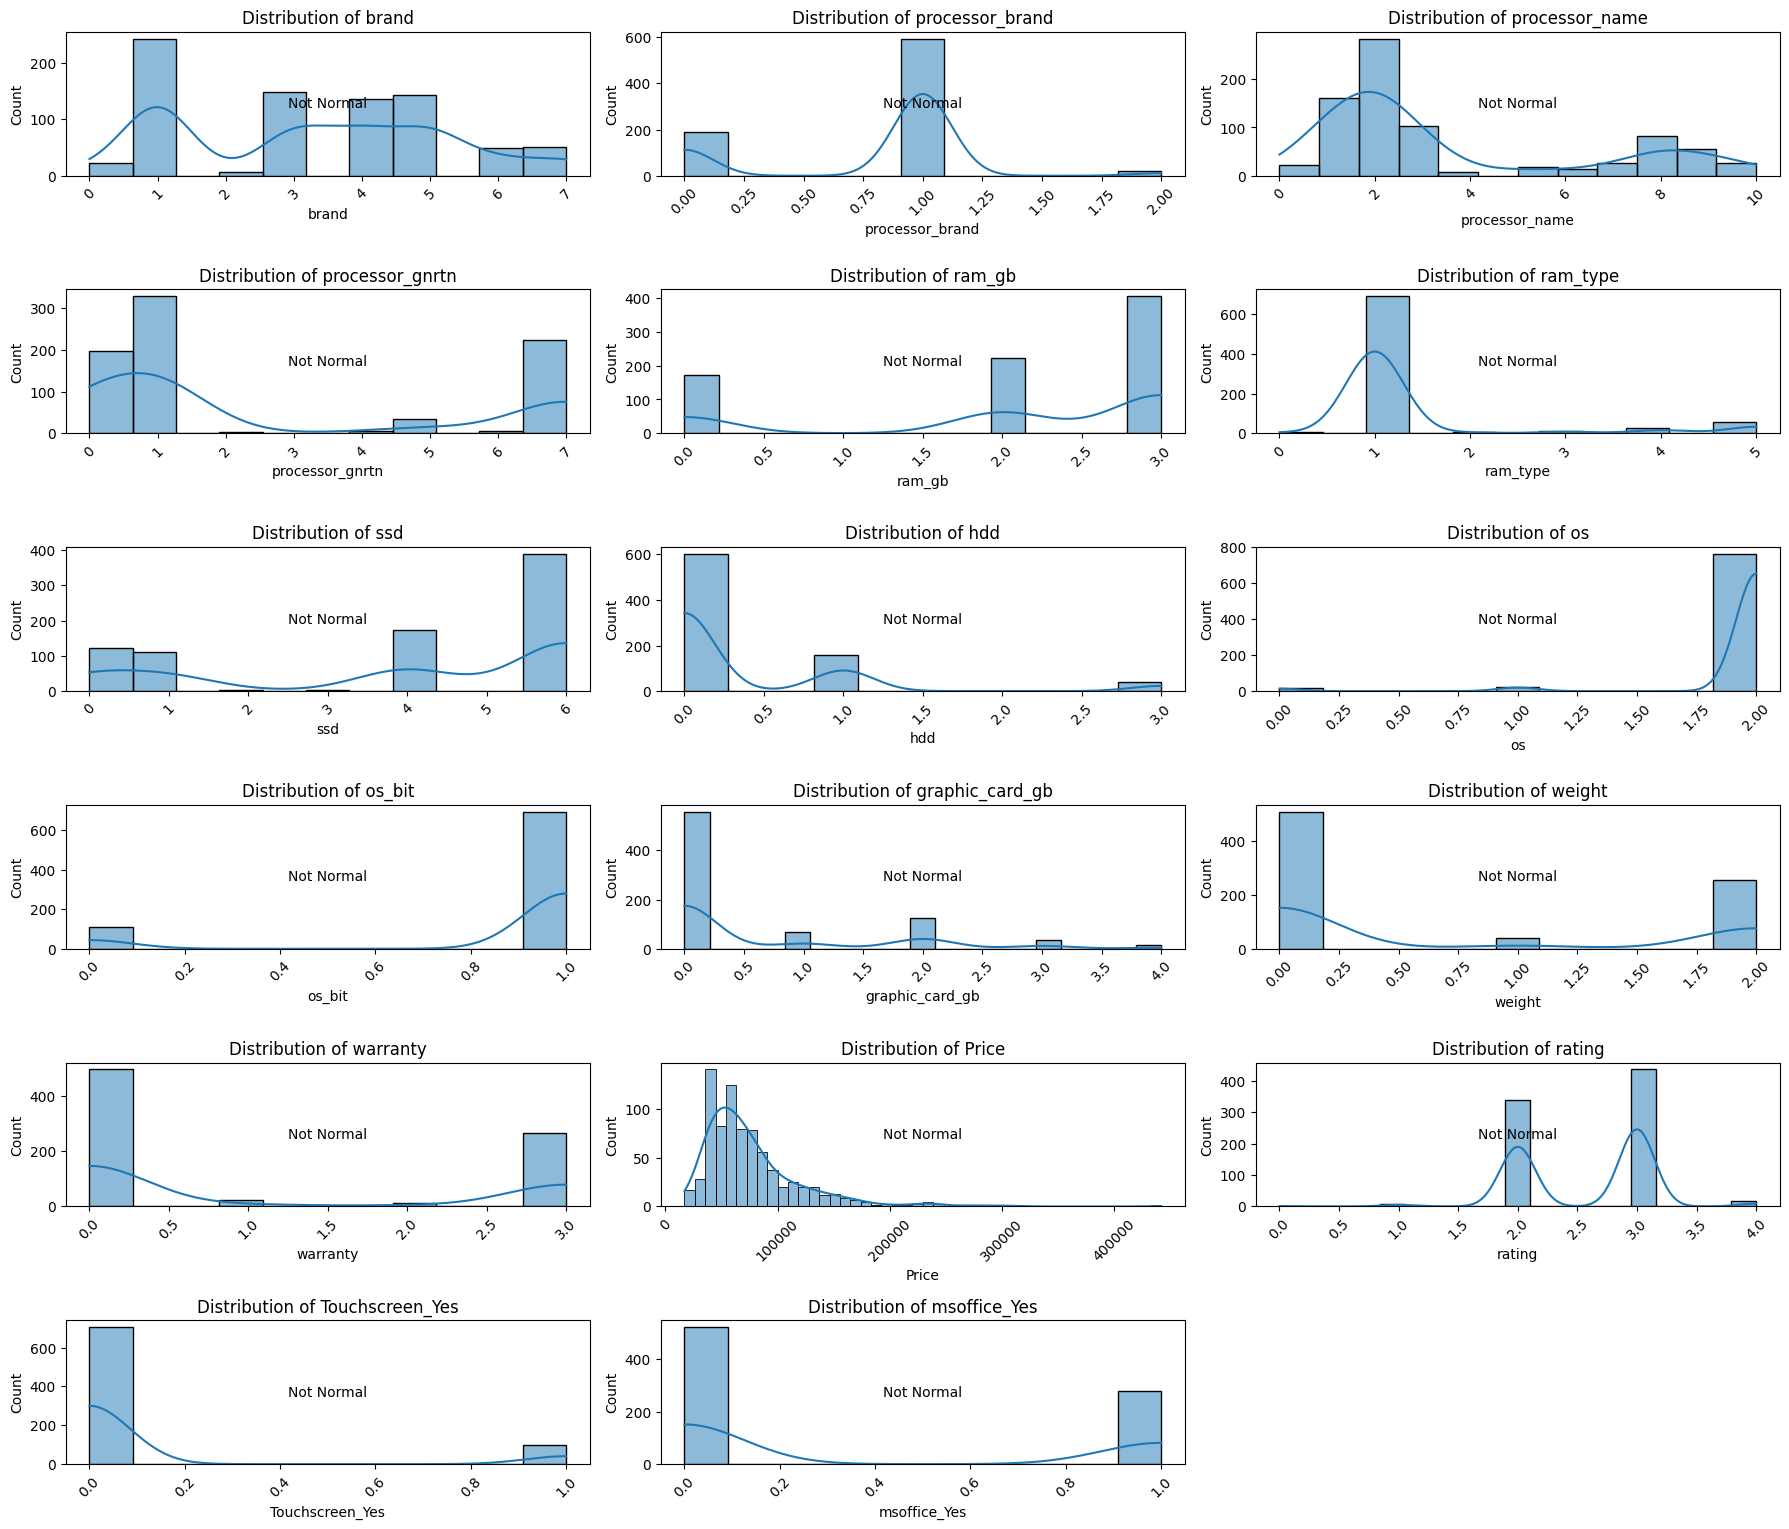

In [48]:
from scipy import stats

plt.figure(figsize=(18, 20))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(8, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for normal distribution
    k2, p = stats.normaltest(data[column])
    #print(k2, p )
    # null hyposthesis => The sample is from Normal dsitribution
    if (p > 0.05):
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(X)
Scaled_Feature=scalar.transform(X)

In [50]:
from sklearn.model_selection import train_test_split
## Logistic Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,rating,Touchscreen_Yes,msoffice_Yes
442,1,1,2,1,3,1,4,1,2,0,0,0,0,3,0,1
598,1,1,3,0,0,5,0,3,0,0,3,0,3,2,0,0
452,1,1,2,1,3,1,4,1,2,1,1,0,0,3,0,1
696,3,0,8,7,3,1,6,0,2,1,0,2,0,2,0,1
339,1,1,2,1,3,5,6,0,2,1,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,5,1,1,0,2,1,4,0,2,0,0,0,3,2,0,0
108,3,1,1,1,3,1,6,0,2,1,0,0,0,3,1,0
275,5,1,2,0,3,1,6,0,2,1,1,0,0,2,0,1
445,1,1,2,1,3,1,4,1,2,1,0,0,0,2,0,0


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
from sklearn.svm import SVR
model =  xgb.XGBRegressor()
# Training the model
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
## predictions
y_pred=model.predict(X_test)

In [58]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 561448280.677209
R^2 Score: 0.7360707521438599


In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),  # Use XGBRegressor for regression tasks
    'LightGBM': lgb.LGBMRegressor(),  # Use LGBMRegressor for regression tasks
    'SVR': SVR()
}

# Dictionary to store results
results = {}

# Perform grid search and evaluation for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {'RMSE': rmse, 'R-squared': r2}
    
    # Print results
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R-squared: {r2}")
    print("\n")

# Print final results
print("Final Results:")
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"RMSE: {result['RMSE']}")
    print(f"R-squared: {result['R-squared']}")
    print("\n")
